In [2]:
print('Hello')

Hello


$$ P_n(x) = \sum_{k=0}^n y_k L_k^{(n)} $$

$$ P_n(x) = \sum_{k=0}^n  \prod_{j=0, j≠k}^n y_k \frac{x-x_j}{x_k-x_j} $$

где $x_j$ – узлы

In [3]:
import numpy as np
import pandas as pd

In [4]:
def f(x):
    return np.sqrt(np.cos(x))

$$ f(x) = \sqrt {cos(x)} $$

Интерполируем функцию $ f(x) $ на интервале $ [-1.25, 1.25] $ c использование полиномов 5 степени

Возьмём n точек на этом интервале с шагом 0.01

In [5]:
#Узнаем, сколько точек нам нужно для шага 0.01

start = -1.25
stop = 1.25
step = 0.01

num_points = int(np.round((stop - start) / step))  + 1 #+1 чтобы включить начальную точку

num_points

251

In [6]:
(5-4) / 0.2 # = 5

a = 4
for i in range(5):
    a = a + 0.2
    print(a)

4.2
4.4
4.6000000000000005
4.800000000000001
5.000000000000001


In [53]:
x = np.linspace(-1.25, 1.25, num_points)

y_true = f(x)

x[20] - x[19]

0.010000000000000009

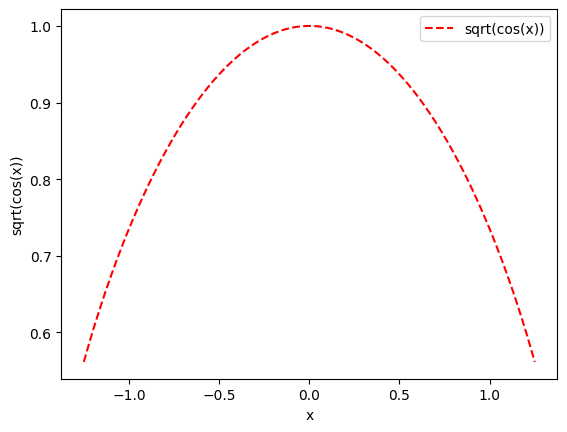

In [62]:
#нарисуем функцю

import matplotlib.pyplot as plt


plt.plot(x, y_true, 'r--', label='sqrt(cos(x))')
plt.xlabel('x')
plt.ylabel('sqrt(cos(x))')
plt.legend()
plt.show()

Интерполируем функцию полиномом 5 степени

In [9]:
from numpy.polynomial import Polynomial

In [10]:
P_5 = Polynomial.fit(
                   x,
                   y_true, 
                   domain=[-1.25, 1.25],
                   deg=5
                    )
P_5

Polynomial([ 9.99321155e-01, -3.86859894e-16, -3.77774953e-01,  1.87808672e-15,
       -5.72190638e-02, -2.04211349e-15], domain=[-1.25,  1.25], window=[-1.,  1.])

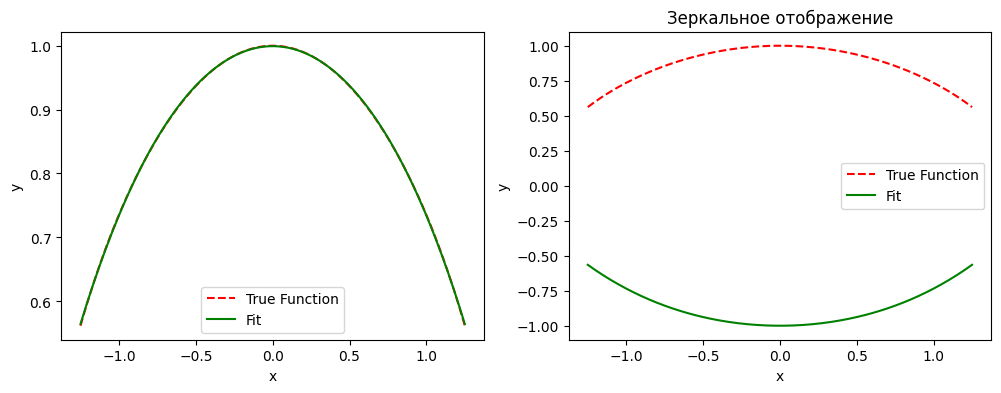

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(x, y_true, 'r--', label='True Function')
ax1.plot(x, P_5(x), 'g', label='Fit')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

ax2.plot(x, y_true, 'r--', label='True Function')
ax2.plot(x, -P_5(x), 'g', label='Fit')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Зеркальное отображение')
ax2.legend()

plt.show()

In [12]:
#from numpy.polynomial import Chebyshev
#c = Chebyshev.fit(x, y_true, deg=1)
#c

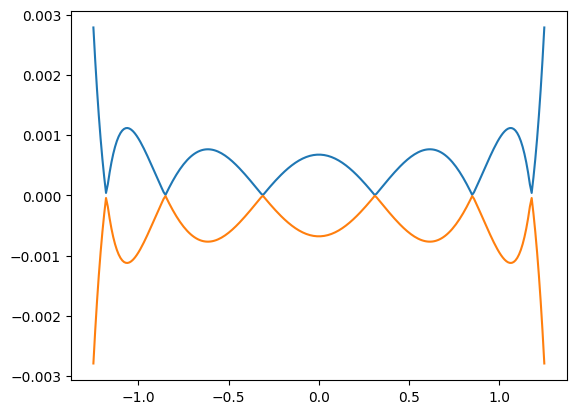

In [13]:
delta = np.abs(y_true - P_5(x))

plt.plot(x, delta, x, -delta)

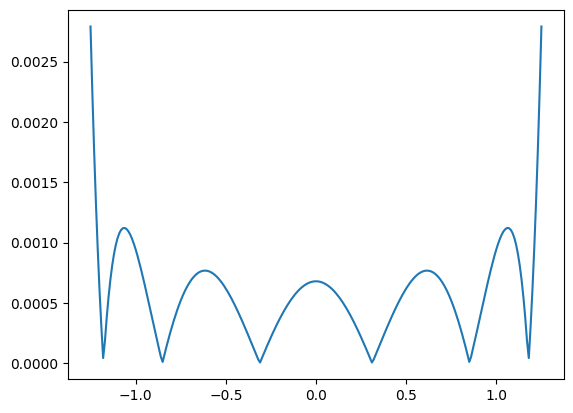

In [65]:
delta = np.abs(y_true - P_5(x))

plt.plot(x, delta)
plt.show()

In [15]:
np.max(delta) #Максимальное значение погрешности

0.0027914207481308795

Оценим максимальную погрешность по формуле

$$ r_n(x) = \frac{f^{(n+1)} (\xi) } {(n+1)!} \prod \limits_{i=0}^n (x-x_i) $$

В нашем случае $ f^{(n+1)} (\xi) = 10^3 $ по условию

где $x_i $ – узлы интерполяции

$$ r_5(x) = \frac{10^3}{6!} \prod_{i=0}^n (x-x_i) $$

$x_i$ – это узлы интерполяции, то есть значения аргумента, при которых нам известно занчение функции, которую мы приближаем

In [68]:
a = [1,2,3]
b = np.linspace(1, 10, 20)
import math

math.prod(a)

6

In [80]:
def r_n(x0, n=5):
    '''
    Сомневаюсь в этой функции
    '''
    #Создадим массив длиной равной количеству известных нам х
    x0_lst = [x0 for i in range(len(x))] #len(x)=251

    
    x_minus_x_i = (np.array(x) - np.array(x0_lst))

    answer = 10**3 / np.math.factorial(n+1) * np.prod(x_minus_x_i)

    return answer


x_r5 = list(map(r_n, x))

x_r5[:10]

[0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0]

In [78]:
A = np.array([1,2,3])

def func(a): return a*2

B = list(map(lambda x: x**2, A))


B

[1, 4, 9]

In [81]:
#Интересное наблюдение

A = np.array([1,2])

list(map(r_n, A))

[-0.0, -3.123530238535537e+67]

In [85]:
A = np.array([1,2])
B = np.array([3,4])
AB = np.concatenate([A,B])
AB

array([1, 2, 3, 4])

In [84]:
arr1 = np.array([0, 1, 2, 3])
arr2 = np.array([4, 5, 6, 7])

print(np.concatenate([arr1, arr2]))

[0 1 2 3 4 5 6 7]


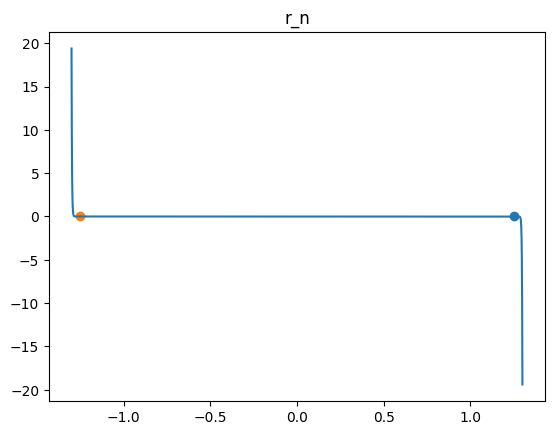

In [100]:
x1 = np.linspace(-1.30, -1.25, 30)

x2 = np.linspace(1.25, 1.30, 30)

X = np.concatenate([x1, x, x2])


plt.plot(X, list(map(r_n, X)))
plt.scatter([1.25], [0])
plt.scatter([-1.25], [0])
plt.title('r_n')
plt.show()